In [5]:
import torch

In [6]:
tensor = torch.ones(4,4)

In [7]:
tensor.shape

torch.Size([4, 4])

In [10]:
tensor[:,1]=0

In [11]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [17]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)

In [18]:
t1.shape

torch.Size([4, 12])

In [19]:
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [24]:
tensor.mul(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [28]:
tensor@tensor

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])

In [29]:
tensor.matmul(tensor)

tensor([[3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.],
        [3., 0., 3., 3.]])

In [31]:
import numpy as np

In [32]:
n = np.ones(5)

In [33]:
n

array([1., 1., 1., 1., 1.])

In [34]:
t = torch.from_numpy(n)

In [35]:
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [36]:
np.add(n,1)

array([2., 2., 2., 2., 2.])

In [37]:
n

array([1., 1., 1., 1., 1.])

In [38]:
np.add(1,n,out=n)

array([2., 2., 2., 2., 2.])

In [39]:
n

array([2., 2., 2., 2., 2.])

In [40]:
t

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

# Autograd

In [56]:
import torchvision

In [57]:
model = torchvision.models.resnet18(weights=True)

/home/sanjeev/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [58]:
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)

In [59]:
predictions = model(data)

In [60]:
loss = (predictions-labels).sum()

In [61]:
loss.backward()

In [63]:
model.parameters()

<generator object Module.parameters at 0x7f7a8d847580>


In [64]:
optim = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

In [65]:
optim.step()

# Neural Network

In [101]:
#https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [89]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [90]:
params = list(net.parameters())

In [91]:
len(params)

10

In [92]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0824, -0.0182, -0.0632,  0.1213,  0.0026, -0.0980, -0.1095,  0.0681,
         -0.0530, -0.0263]], grad_fn=<AddmmBackward0>)


In [93]:
params[0].size()

torch.Size([6, 1, 5, 5])

In [94]:
net.zero_grad()

In [95]:
out.backward(torch.rand(1,10))

In [96]:
#loss function
output = net(input)
target = torch.rand(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output,target)
print(loss)

tensor(0.4742, grad_fn=<MseLossBackward0>)


In [98]:
#backprop
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad before backward
tensor([-0.0073, -0.0012,  0.0118, -0.0040, -0.0010,  0.0037])


In [99]:
#weight update
learning_rate = 0.01

for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

In [100]:
import torch.optim as optim

optimiser = optim.SGD(net.parameters(),lr=0.01)
optimiser.zero_grad()

output = net(input)
loss = criterion(output,target)

loss.backward()
optimiser.step()

# Training an image classifier

In [102]:
import torchvision
import torchvision.transforms as transforms

In [103]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [104]:
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [105]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified


In [106]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [107]:
import matplotlib.pyplot as plt

In [108]:
def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()


In [109]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

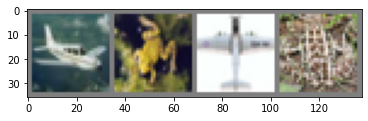

plane frog  plane frog 


In [111]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [112]:
#Define a CNN
import torch.nn as nn
import torch.nn.functional as F

In [126]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [127]:
#Define a Loss function and optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



In [128]:
#Train the network
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.196
[1,  4000] loss: 1.870
[1,  6000] loss: 1.690
[1,  8000] loss: 1.602
[1, 10000] loss: 1.539
[1, 12000] loss: 1.480
[2,  2000] loss: 1.433
[2,  4000] loss: 1.367
[2,  6000] loss: 1.365
[2,  8000] loss: 1.329
[2, 10000] loss: 1.320
[2, 12000] loss: 1.300
Finished Training


In [129]:
#save our trained model:
path = './cifar_net.pth'
torch.save(net.state_dict(),path)

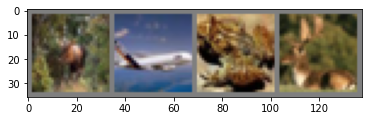

GroundTruth:  deer  plane frog  deer 


In [130]:
#Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [131]:
#load save model
net = Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [132]:
outputs = net(images)

In [133]:
_,predicted = torch.max(outputs,1)

In [134]:
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(4)))

Predicted:  deer  ship  frog  frog 


In [137]:
#network performs on the whole dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images.label = data
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print(f'accuracy: {100*correct//total} % ')

accuracy: 50 % 


In [138]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

In [142]:
with torch.no_grad():
    for data in testloader:
        images.labels = data
        outputs = net(images)
        
        _, predictions = torch.max(outputs,1)
        for label, prediction in zip(labels, predictions):
            if label==prediction:
                correct_pred[classes[label]]+=1
            total_pred[classes[label]] +=1

In [146]:
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / (total_pred[classname]+1)
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 50.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 100.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
